### Pokemon Image Classification using CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

#### Load and preprocess data

In [ ]:
# Load train and test data
train_ds = tf.keras.utils.image_dataset_from_directory(
    "pokemon_data/train",
    image_size=(128, 128),
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "pokemon_data/test",
    image_size=(128, 128),
    batch_size=32
)


# Check classnames (Pokemon names)
class_names = train_ds.class_names
print("Pokémon Classes:", class_names)


# Normalize images
normalization_layer = Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Found 144 files belonging to 10 classes.
Found 49 files belonging to 10 classes.
Pokémon Classes: ['bulbasaur', 'caterpie', 'charmander', 'ekans', 'pidgey', 'pikachu', 'rattata', 'spearow', 'squirtle', 'weedle']


#### CNN model

In [ ]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])


train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(len(class_names), activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\saksh\OneDrive\Desktop\project_6\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,876,106 (64.38 MB)

 Trainable params: 16,876,106 (64.38 MB)

 Non-trainable params: 0 (0.00 B)

#### Early Stopping

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

#### Train the model

In [17]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=50,
  callbacks=[early_stopping]
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 669ms/step - accuracy: 0.0715 - loss: 2.3757 - val_accuracy: 0.1224 - val_loss: 2.2607
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 618ms/step - accuracy: 0.1793 - loss: 2.2660 - val_accuracy: 0.2653 - val_loss: 2.1752
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 574ms/step - accuracy: 0.2323 - loss: 2.1568 - val_accuracy: 0.2245 - val_loss: 2.1097
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 564ms/step - accuracy: 0.2122 - loss: 2.0935 - val_accuracy: 0.2041 - val_loss: 2.0104
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 598ms/step - accuracy: 0.3430 - loss: 1.9395 - val_accuracy: 0.3265 - val_loss: 1.8947
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 562ms/step - accuracy: 0.4570 - loss: 1.7610 - val_accuracy: 0.4694 - val_loss: 1.7454
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 564ms/step - accuracy: 0.5214 - loss: 1.6299 - val_accuracy: 0.5306 - val_loss: 1.6315
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 593ms/step - accuracy: 0.5334 - loss: 1.4806 - val_accuracy: 0.4694 - val_loss:

#### Model Performance

In [18]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8014 - loss: 0.7299
Test Accuracy: 79.59%


In [ ]:
# Save the trained model
model.save('model.keras')

#### Predict New data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


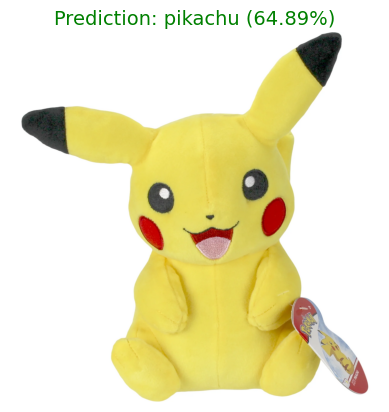

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


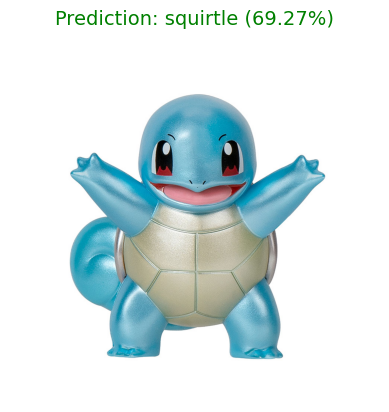

In [ ]:
def predict_pokemon(image_path):
    try:
        img = image.load_img(image_path, target_size=(128, 128))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_index = np.argmax(prediction)
        predicted_class = class_names[predicted_index]
        confidence = prediction[0][predicted_index] * 100

        plt.imshow(plt.imread(image_path))
        plt.axis("off")
        plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)", fontsize=14, color='green')
        plt.show()
    
    except Exception as e:
        print(f"Error: {e}")

# Test
predict_pokemon("./sample-data/pokemon1.webp")
predict_pokemon("./sample-data/pokemon2.jpg")